In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
cat_dict={}
with open('category_id.txt') as f:
    for line in f.readlines():
        split = line.split(' ')
        c_id=int(split[0])
        name = ' '.join(split[1:])
        cat_dict[c_id]=name.replace('\n','')

In [3]:
df = pd.read_csv('orders_data.csv')
df.drop(['OrderId'],axis=1,inplace=True)

for column in df.iloc[:,1:9]:
    num = column.split('_')[-1]
    df[[column,f'order_item_{num}_cat']] = df[column].str.split('__',expand=True)
df.head()

,Outfit_type,order_item_1,order_item_2,order_item_3,order_item_4,order_item_5,order_item_6,order_item_7,order_item_8,order_item_1_cat,order_item_2_cat,order_item_3_cat,order_item_4_cat,order_item_5_cat,order_item_6_cat,order_item_7_cat,order_item_8_cat
0,1,yoins leather sexy v-neck sleeveless crop top,solid color long sleeve irregular blazer,alice+olivia floral pattern a-line skirt,zipped top chunky booties,gold boho turquoise leaf tassel earrings,etro heart locket necklace,1 flower mandala blue crystal clear phone case...,velvetines liquid matte lipstick,11,236,9,261,64,62,1967,200
1,0,ag jeans super skinny jeans,pompom beanie,mock neck sweater,zip quilted pilot jacket,tie faux leather short boots,pcs makeup brushes set pcs beauty blush brush ...,0,0,237,55,19,25,261,319,None,None
2,0,yoins plus size blue stripe shirt,yoins grey sleeveless faux fur coat,topshop moto dark indigo jamie jeans,yoins grey buckle design chunky heels short boots,wild side mini hair,bobbi brown peach,set,valentino small shoulder bag goop,11,24,237,261,58,188,171,37
3,1,boho brown pink print wood beaded halter summe...,steve madden women's sandals,boho suede fringe crossbody,yoins boho tassel drop earrings,simons boho weave floppy hat,0,0,0,4,46,37,64,55,None,None,None
4,0,yoins beige double breasted 0 outerwear,classic skinny jeans,sonia rykiel metallic striped knitted top,yoins apricot leather-look tote bag,yoins brown lace-up design sole short boots,miu miu heart sunglasses,ted baker crystal bow leather bracelet,sophie miller sterling silver black white cubi...,24,237,11,36,261,57,106,64


In [4]:
print('Distribution of data labelwise')
df['Outfit_type'].value_counts()

Distribution of data labelwise


0    100
1    100
Name: Outfit_type, dtype: int64

In [5]:
c1_df = df[df['Outfit_type']==1]
b0_df = df[df['Outfit_type']==0]

In [6]:
def get_frq_of_cat(df):
    arr = df.iloc[:,9:17].to_numpy().flatten()
    arr = [cat_dict[int(i)] for i in arr if i!=None]
    print(f'Total number of orders:{len(arr)}')
    temp_df = pd.DataFrame()
    temp_df['categories']=arr
    return temp_df.value_counts()

In [7]:
print('For casual style:')
c_value_counts= get_frq_of_cat(c1_df)
print()
print('For bohemian style:')
b_value_counts = get_frq_of_cat(b0_df)

For casual style:
Total number of orders:654

For bohemian style:
Total number of orders:658


In [8]:
# def plot_catgeories(count_df,label):
#     count_df = count_df[(count_df[label]>=10)]
#     count_df = count_df.sort_values(label,ascending=False)
#     count_df.plot(kind='bar',figsize=(20,10),title=f'frequently occuring words in {label} style')


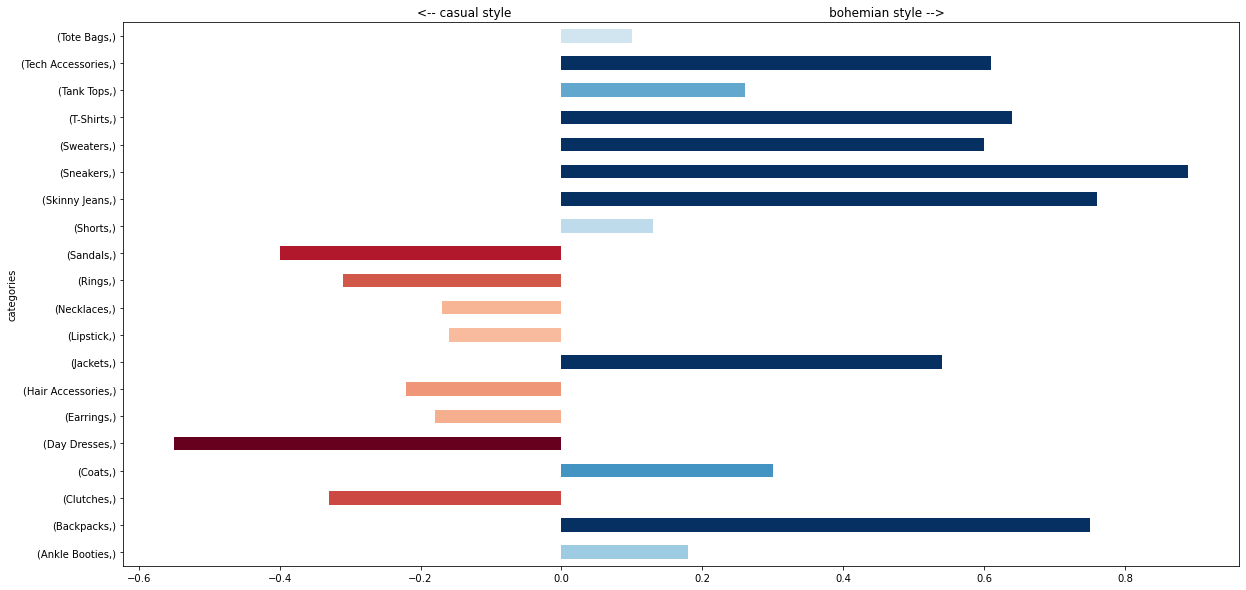

In [9]:
count_df = pd.concat([b_value_counts,c_value_counts],axis=1)
count_df.columns = ['bohemian','casual']
count_df = count_df.fillna(0)

count_df['diff'] = (count_df['bohemian']-count_df['casual'])/(count_df['bohemian']+count_df['casual'])

cmap = plt.get_cmap('RdBu')

req_range=np.round(np.arange(-0.1,0.1,0.01),2)
count_df = count_df.round(2)
temp = count_df[~(count_df['diff'].isin(req_range)) & ((count_df['casual']>10) | (count_df['bohemian']>10))]
color = (temp['diff']+0.5).apply(cmap)

title = ('<-- {} {} {} -->'.format('casual style',' ' * 80,'bohemian style'))
_=temp['diff'].plot(kind='barh',figsize=(20,10),color=color,title=title)

In [10]:
print(f'Total number of categories in data:{len(cat_dict)}')

Total number of categories in data:380


from the above diagram we can see that categories like sandals,day dresses are mostly casual type and categories like sneakers,skinny jeans are bohemian style.Although there are 380 different categories, outfit_type specific categories are less than five for each type, so actually using the categories wouldn't make much difference

In [11]:
df.head()

,Outfit_type,order_item_1,order_item_2,order_item_3,order_item_4,order_item_5,order_item_6,order_item_7,order_item_8,order_item_1_cat,order_item_2_cat,order_item_3_cat,order_item_4_cat,order_item_5_cat,order_item_6_cat,order_item_7_cat,order_item_8_cat
0,1,yoins leather sexy v-neck sleeveless crop top,solid color long sleeve irregular blazer,alice+olivia floral pattern a-line skirt,zipped top chunky booties,gold boho turquoise leaf tassel earrings,etro heart locket necklace,1 flower mandala blue crystal clear phone case...,velvetines liquid matte lipstick,11,236,9,261,64,62,1967,200
1,0,ag jeans super skinny jeans,pompom beanie,mock neck sweater,zip quilted pilot jacket,tie faux leather short boots,pcs makeup brushes set pcs beauty blush brush ...,0,0,237,55,19,25,261,319,None,None
2,0,yoins plus size blue stripe shirt,yoins grey sleeveless faux fur coat,topshop moto dark indigo jamie jeans,yoins grey buckle design chunky heels short boots,wild side mini hair,bobbi brown peach,set,valentino small shoulder bag goop,11,24,237,261,58,188,171,37
3,1,boho brown pink print wood beaded halter summe...,steve madden women's sandals,boho suede fringe crossbody,yoins boho tassel drop earrings,simons boho weave floppy hat,0,0,0,4,46,37,64,55,None,None,None
4,0,yoins beige double breasted 0 outerwear,classic skinny jeans,sonia rykiel metallic striped knitted top,yoins apricot leather-look tote bag,yoins brown lace-up design sole short boots,miu miu heart sunglasses,ted baker crystal bow leather bracelet,sophie miller sterling silver black white cubi...,24,237,11,36,261,57,106,64


In [12]:
df.head()

,Outfit_type,order_item_1,order_item_2,order_item_3,order_item_4,order_item_5,order_item_6,order_item_7,order_item_8,order_item_1_cat,order_item_2_cat,order_item_3_cat,order_item_4_cat,order_item_5_cat,order_item_6_cat,order_item_7_cat,order_item_8_cat
0,1,yoins leather sexy v-neck sleeveless crop top,solid color long sleeve irregular blazer,alice+olivia floral pattern a-line skirt,zipped top chunky booties,gold boho turquoise leaf tassel earrings,etro heart locket necklace,1 flower mandala blue crystal clear phone case...,velvetines liquid matte lipstick,11,236,9,261,64,62,1967,200
1,0,ag jeans super skinny jeans,pompom beanie,mock neck sweater,zip quilted pilot jacket,tie faux leather short boots,pcs makeup brushes set pcs beauty blush brush ...,0,0,237,55,19,25,261,319,None,None
2,0,yoins plus size blue stripe shirt,yoins grey sleeveless faux fur coat,topshop moto dark indigo jamie jeans,yoins grey buckle design chunky heels short boots,wild side mini hair,bobbi brown peach,set,valentino small shoulder bag goop,11,24,237,261,58,188,171,37
3,1,boho brown pink print wood beaded halter summe...,steve madden women's sandals,boho suede fringe crossbody,yoins boho tassel drop earrings,simons boho weave floppy hat,0,0,0,4,46,37,64,55,None,None,None
4,0,yoins beige double breasted 0 outerwear,classic skinny jeans,sonia rykiel metallic striped knitted top,yoins apricot leather-look tote bag,yoins brown lace-up design sole short boots,miu miu heart sunglasses,ted baker crystal bow leather bracelet,sophie miller sterling silver black white cubi...,24,237,11,36,261,57,106,64


In [13]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [14]:
def stem_sent(sentence):
    words = sentence.split(' ')
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

In [15]:
corpus = df.iloc[:,1:9].to_numpy().flatten()
corpus_lemmatized = [stem_sent(i) for i in corpus if i!='0']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus_lemmatized)


In [17]:
sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1],reverse=False)

[('100ml', 0),
 ('100mm', 1),
 ('10k', 2),
 ('14k', 3),
 ('18k', 4),
 ('18kt', 5),
 ('1990', 6),
 ('38mm', 7),
 ('40mm', 8),
 ('4s', 9),
 ('50ml', 10),
 ('5so', 11),
 ('6s', 12),
 ('80', 13),
 ('8mm', 14),
 ('90', 15),
 ('abercrombi', 16),
 ('accent', 17),
 ('accessor', 18),
 ('accessori', 19),
 ('acn', 20),
 ('across', 21),
 ('acryl', 22),
 ('adida', 23),
 ('adjust', 24),
 ('aeo', 25),
 ('aerin', 26),
 ('aeropostal', 27),
 ('ag', 28),
 ('air', 29),
 ('aldo', 30),
 ('alexand', 31),
 ('alic', 32),
 ('alice', 33),
 ('alloy', 34),
 ('allurez', 35),
 ('amazon', 36),
 ('amber', 37),
 ('american', 38),
 ('amethyst', 39),
 ('anastasia', 40),
 ('anchor', 41),
 ('angel', 42),
 ('ankl', 43),
 ('ann', 44),
 ('antiqu', 45),
 ('antonio', 46),
 ('anya', 47),
 ('appl', 48),
 ('appliqu', 49),
 ('apricot', 50),
 ('aquazzura', 51),
 ('ariana', 52),
 ('armani', 53),
 ('armi', 54),
 ('around', 55),
 ('arrang', 56),
 ('arrow', 57),
 ('art', 58),
 ('artifici', 59),
 ('aso', 60),
 ('aspin', 61),
 ('asymmetr'

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=15)
X = vectorizer.fit(corpus_lemmatized)

In [19]:
def get_vec(sent):
    return vectorizer.transform([sent]).todense().squeeze()

In [20]:
for column in df.iloc[:,1:9]:
    temp = df[column].apply(get_vec)
    num = column.split('_')[-1]
    df[f'order_item_{num}_vec']=temp
    

In [21]:
X = df['order_item_1_vec'].values

In [22]:
X = np.vstack(X)

In [23]:
y = df['Outfit_type'].values

In [24]:
X.shape,y.shape

((200, 83), (200,))

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [32]:
x_train.shape,y_train.shape

((150, 83), (150,))

In [30]:
import xgboost as xgb

In [47]:
model = xgb.XGBClassifier()
eval_set = [(x_test,y_test)]
print('fitting the data')

model.fit(x_train,y_train, eval_set=eval_set,
             early_stopping_rounds=30,verbose=True,
)



fitting the data
[12:24:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.69661
[1]	validation_0-logloss:0.69554
[2]	validation_0-logloss:0.70076
[3]	validation_0-logloss:0.70214
[4]	validation_0-logloss:0.70460
[5]	validation_0-logloss:0.71119
[6]	validation_0-logloss:0.71338
[7]	validation_0-logloss:0.72014
[8]	validation_0-logloss:0.72754
[9]	validation_0-logloss:0.73242
[10]	validation_0-logloss:0.73802
[11]	validation_0-logloss:0.74399
[12]	validation_0-logloss:0.74569
[13]	validation_0-logloss:0.74392
[14]	validation_0-logloss:0.74272
[15]	validation_0-logloss:0.74190
[16]	validation_0-logloss:0.74180
[17]	validation_0-logloss:0.74443
[18]	validation_0-logloss:0.74640
[19]	validation_0-logloss:0.74599
[20]	validation_0-logloss:0.74544
[21]	validation_0-logloss:0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
preds = model.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,preds)

0.5